# **Titanic Survival Preiction**

**In the following scipt i use the following models with VOTING CLASSIFIER:**
* SVC
* Random Forest Classifier
* Logistic Regression
* XGBOOST
* MLP Classifier

**At last i ensembled them using the voting classifier with higher weights for the higher acc models**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
palette=sns.color_palette('magma')
sns.set(palette=palette)

In [3]:
train_data=pd.read_csv('/kaggle/input/titanic/train.csv', index_col='PassengerId')
test_data=pd.read_csv('/kaggle/input/titanic/test.csv', index_col='PassengerId')

train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **EDA**

In [4]:
#Dropping the Name and Ticket columns because i dont think i can make use of them for now
train_data_clean=train_data.drop(['Name','Ticket'], axis=1)

In [5]:
train_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [6]:
#I noticed that there are over 600 null values in the Cabin column which is over 70%
#Extracting the cabin letter into a new column
train_data_clean['Cabin Letter'] = train_data_clean['Cabin'].str.extract('(\w)')
train_data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin Letter
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S,NaN
2,1,1,female,38.0,1,0,71.2833,C85,C,C
3,1,3,female,26.0,0,0,7.9250,NaN,S,NaN
4,1,1,female,35.0,1,0,53.1000,C123,S,C
5,0,3,male,35.0,0,0,8.0500,NaN,S,NaN


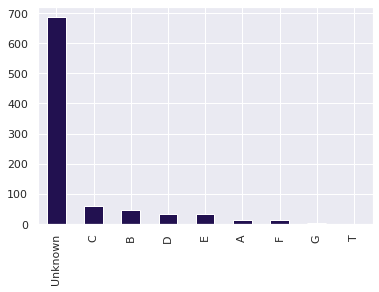

In [7]:
#Filling the null cabin letters with 'unknown' as a value
train_data_clean['Cabin Letter'].fillna('Unknown', inplace=True)
train_data_clean['Cabin Letter'].value_counts().plot(kind='bar')

train_data_clean['Cabin Letter'].value_counts().plot(kind='bar')
plt.show()

In [8]:
#Dropping the Cabin column
train_data_clean.drop(['Cabin'], axis=1, inplace=True)

In [9]:
#Embarked has only 2 missing values so im gonna drop them
train_data_clean = train_data_clean[train_data_clean['Embarked'].notna()]
train_data_clean.info()
#Age has some missing values ill be back to that later

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      889 non-null    int64  
 1   Pclass        889 non-null    int64  
 2   Sex           889 non-null    object 
 3   Age           712 non-null    float64
 4   SibSp         889 non-null    int64  
 5   Parch         889 non-null    int64  
 6   Fare          889 non-null    float64
 7   Embarked      889 non-null    object 
 8   Cabin Letter  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


In [10]:
#Creating a new feature 'relatives' which consists of SibSp+Parch
train_data_clean['relatives']=train_data_clean['SibSp']+train_data_clean['Parch']

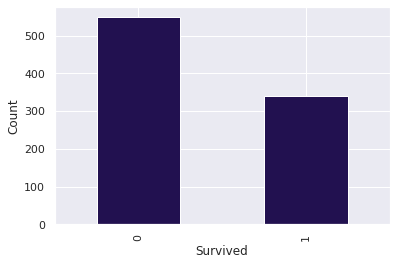

In [11]:
train_data_clean['Survived'].value_counts().plot(kind='bar')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

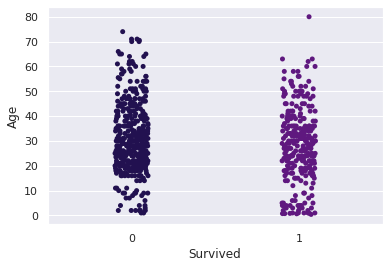

In [12]:
sns.stripplot(data=train_data_clean, x='Survived', y='Age')
plt.show()

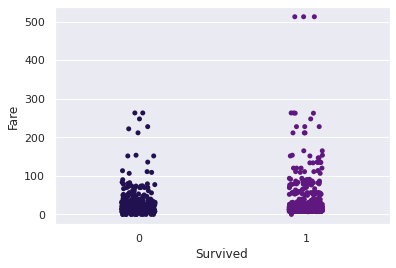

In [13]:
sns.stripplot(data=train_data_clean, x='Survived', y='Fare')
plt.show()

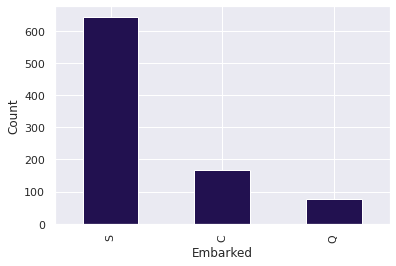

In [14]:
train_data_clean['Embarked'].value_counts().plot(kind='bar')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

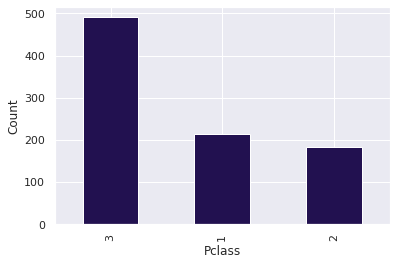

In [15]:
train_data_clean['Pclass'].value_counts().plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

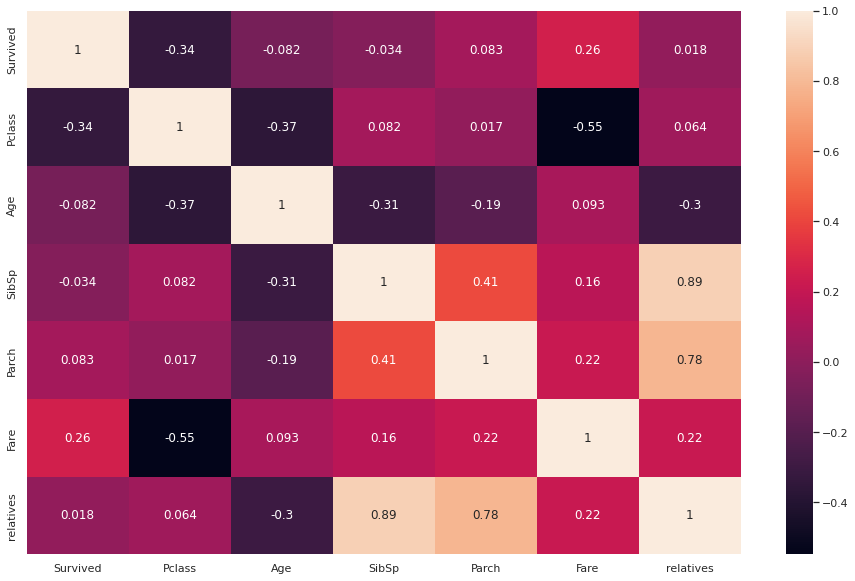

In [16]:
#Correlation Heatmap
plt.figure(figsize=(16,10))
sns.heatmap(train_data_clean.corr(), annot=True)
plt.show()

# **Preprocessing**

In [17]:
X= train_data_clean.drop('Survived', axis=1)
y= train_data_clean['Survived']

X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin Letter,relatives
PassengerId,,,,,,,,,
1,3,male,22.0,1,0,7.2500,S,Unknown,1
2,1,female,38.0,1,0,71.2833,C,C,1
3,3,female,26.0,0,0,7.9250,S,Unknown,0
4,1,female,35.0,1,0,53.1000,S,C,1
5,3,male,35.0,0,0,8.0500,S,Unknown,0


In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

#Select categorical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
categorical_cols

['Sex', 'Embarked', 'Cabin Letter']

In [19]:
#Select numerical columns
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
numerical_cols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'relatives']

In [20]:
#Preprocessing for numerical data(Age in the train)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [21]:
#Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  #handle unknown wont give an error if it gets a new value in the test set for the categorical values
])

In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
                                  'relatives']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Embarked', 'Cabin Letter'])])

# **Model Pipelines**

Note: I determined the model parameters using gridsearchCV but didnt include it in this notebook. 

In [23]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth= 6, min_samples_leaf= 1, min_samples_split= 2, random_state=0)
rfc_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', rfc)
                              ])
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc_pipeline, X, y, cv=5)
print('Random Forest Scores:',scores)
print('Random Forest:',scores.mean())


Random Forest Scores: [0.81460674 0.80898876 0.8258427  0.79775281 0.83050847]
Random Forest: 0.8155398971624453


In [24]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg_classifier=LogisticRegression(C= 0.1, penalty= 'l2', solver='liblinear',random_state=0)
log_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', log_reg_classifier)
                                  ])
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg_pipeline, X, y, cv=5)
print('Logistic Regression Scores:',scores)
print('Logistic Regression:',scores.mean())

Logistic Regression Scores: [0.78651685 0.78651685 0.79213483 0.76966292 0.83050847]
Logistic Regression: 0.7930679870500857


In [25]:
#XGBoost
from xgboost import XGBClassifier
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate= 0.1, max_depth= 5, min_child_weight= 1,
                    n_estimators= 100, subsample= 1.0, use_label_encoder=False,
                    verbosity=0, random_state=0)
xgb_pipeline= Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', xgb)
                             ])
scores = cross_val_score(xgb_pipeline, X, y, cv=5)
print('XGB Classifier Scores:',scores)
print('XGB Classifier:',scores.mean())

XGB Classifier Scores: [0.79775281 0.81460674 0.87078652 0.82022472 0.86440678]
XGB Classifier: 0.8335555132355742


In [26]:
#SVC
from sklearn.svm import SVC
svc = SVC(C= 3, kernel= 'rbf', random_state=0, probability=True)
svc_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', svc)
                              ])
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc_pipeline, X, y, cv=5)
print('SVC Scores:',scores)
print('SVC:',scores.mean())

SVC Scores: [0.8258427  0.79775281 0.82022472 0.80337079 0.8700565 ]
SVC: 0.8234495016822192


In [27]:
#MLP
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(max_iter=2000, random_state=0, early_stopping=True)
mlp_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', mlp)
                              ])
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp_pipeline, X, y, cv=5)
print('MLP Scores:',scores)
print('MLP:',scores.mean())

MLP Scores: [0.76404494 0.80337079 0.83146067 0.80337079 0.85310734]
MLP: 0.8110709071288008


# **Final Model**

In [28]:
from sklearn.ensemble import VotingClassifier
#I've tried alot of combinations in the voting classifier but these 3 got the best score on the submission although
#they werent the highest on the train/validation
voting = VotingClassifier(estimators=[
        ('rfc', rfc), ('log', log_reg_classifier), ('svc', svc)],  
        voting='hard')
voting_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', voting)
                                 ])
from sklearn.model_selection import cross_val_score
scores = cross_val_score(voting_pipeline, X, y, cv=5)
print('Voting Classifier Scores:',scores)
print('Voting:',scores.mean())


Voting Classifier Scores: [0.82022472 0.80337079 0.8258427  0.79213483 0.85310734]
Voting: 0.8189360756681268


**Validation**

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid =train_test_split(X, y, test_size=0.2, random_state=42)

voting_pipeline.fit_transform(X_train, y_train)
y_pred= voting_pipeline.predict(X_valid)


Voting Classifier accuracy score: 82.58%
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       109
           1       0.77      0.78      0.78        69

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178



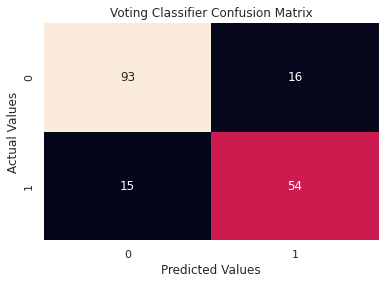

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm=confusion_matrix(y_valid, y_pred)
print('Voting Classifier accuracy score:', '{:.2%}'.format(accuracy_score(y_valid, y_pred)))
print(classification_report(y_valid, y_pred))
sns.heatmap(cm, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Voting Classifier Confusion Matrix')
plt.show()

Note: Accuracy can vary depending on the random split********

In [31]:
#Training the final model
voting_pipeline.fit(X,y)


#Test data
test_data=pd.read_csv('/kaggle/input/titanic/test.csv', index_col='PassengerId')
test_data_clean=test_data.drop(['Name','Ticket'], axis=1)
test_data_clean['Cabin Letter'] = test_data_clean['Cabin'].str.extract('(\w)')
test_data_clean['Cabin Letter'].fillna('Unknown', inplace=True)
test_data_clean.drop(['Cabin'], axis=1, inplace=True)
test_data_clean['relatives']=test_data_clean['SibSp']+test_data_clean['Parch']

predicted=voting_pipeline.predict(test_data_clean)
ids=test_data.index
pred_df= pd.DataFrame({'PassengerId': ids,
                       'Survived': predicted})
pred_df.to_csv('submission.csv', index=False)